In [27]:
import numpy as np  
import matplotlib.pyplot as plt
import torch

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial feature transformer
poly = PolynomialFeatures(degree=4)

def get_poly_features(X):
    X = poly.fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    return X

# True feature vector
theta_tru = torch.tensor([
    3.0619, -11.4365,  42.0929,  16.0846, -62.3337, -45.3745,  16.2397,
    6.8974,  18.5813, -25.6485,  14.6008, -14.0311,  12.6881, -35.1548,
    -16.3775])


In [29]:
# Check what polynomial features look like
torch.manual_seed(42)

n_train = 500
X_train = torch.rand(n_train, 2) * 2 - 1 # Create a random features in [-1, 1] x [-1, 1]
X_poly = get_poly_features(X_train)
X_poly.shape, theta_tru.shape

(torch.Size([500, 15]), torch.Size([15]))

<AxesSubplot: >

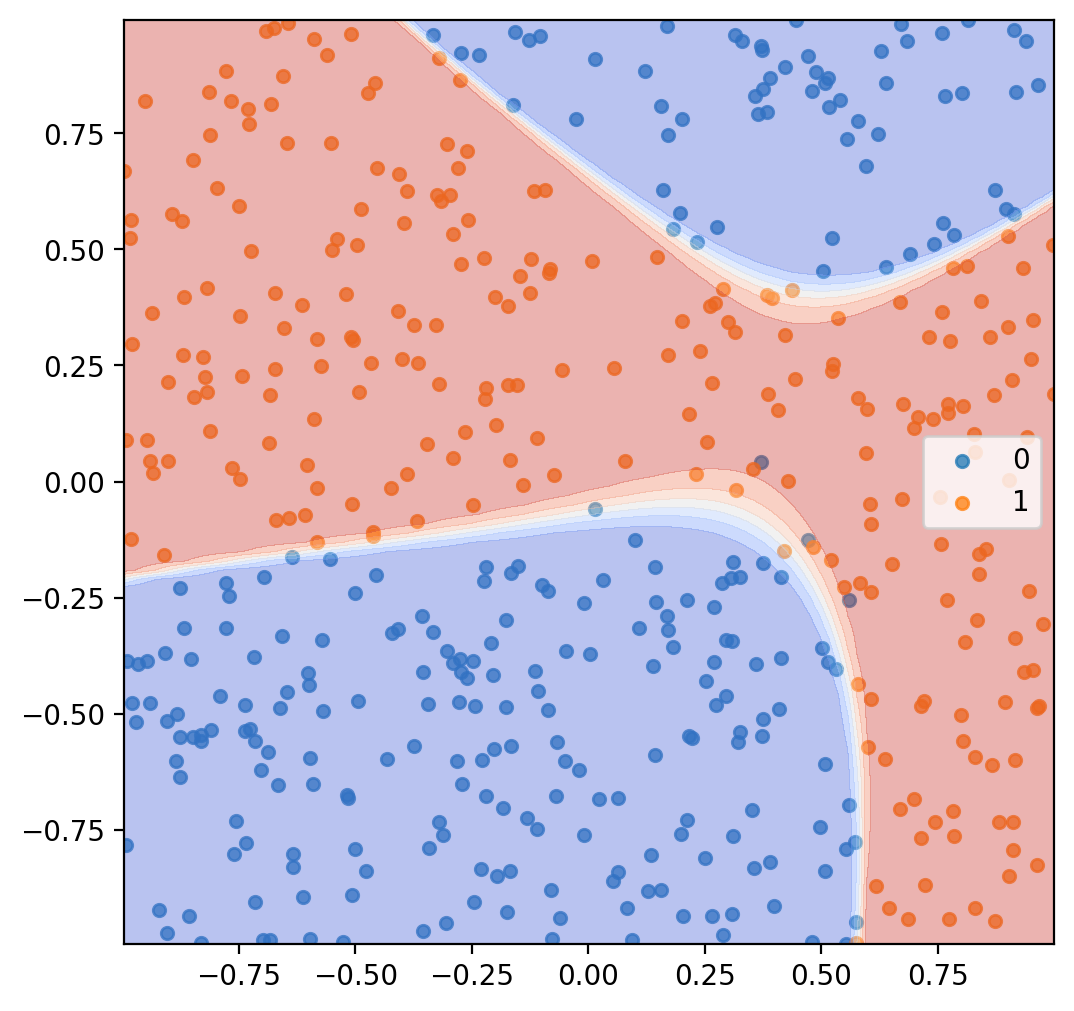

In [32]:
# True model

from helpers import plot_decision_bounary

torch.manual_seed(42)

model_tru = lambda X: torch.sigmoid(get_poly_features(X) @ theta_tru)

def gen_data(n_samp):
    X = torch.rand(n_samp, 2) * 2 - 1 # Create a random features in [-1, 1] x [-1, 1]   
    prob = model_tru(X)
    y = torch.distributions.Bernoulli(prob).sample()
    y = y.view(-1,1)  # make it a column vector, super important!
    return X, y

# Generate training data
X_train, y_train = gen_data(n_train)

# plot decision boundary
plot_decision_bounary(model_tru, X_train, y_train)